In [1]:
# Using Python 3.8.3

# DS libraries
import pandas as pd
import numpy as np

# CSV readers
import csv

# Datavis: use matplotlib
import matplotlib.pyplot as plt


Data visualization of batting statistics in the world of Sabermetrics.

In [2]:
# Get the players and their batting stats (regular season only)
batstats = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv",sep=',')
slugppl = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv",sep=',')

In [3]:
slugppl.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,20247.000000,20079.000000,19938.000000,9991.000000,9990.000000,9989.000000,19543.000000,19623.000000
mean,1935.209019,6.631555,15.618116,1966.999399,6.486486,15.521374,187.959423,72.357794
std,43.013513,3.463773,8.762962,33.316762,3.535013,8.792351,22.430914,2.617253
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1897.000000,4.000000,8.000000,1944.000000,3.000000,8.000000,172.000000,71.000000
50%,1943.000000,7.000000,16.000000,1969.000000,6.000000,15.000000,185.000000,72.000000
75%,1974.000000,10.000000,23.000000,1994.000000,10.000000,23.000000,200.000000,74.000000
max,2001.000000,12.000000,31.000000,2022.000000,12.000000,31.000000,320.000000,83.000000


In [4]:
batstats.describe()
# batstats

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108789.000000,108033.000000,106421.000000,85248.000000,108789.000000,106689.000000,72139.000000,105973.000000,102721.000000,72686.000000,83348.000000
mean,1967.221631,1.078914,50.740488,139.241320,18.483496,36.388605,6.202024,1.247075,2.850150,16.790388,2.918775,1.177353,12.842907,20.559814,1.055227,1.057958,2.197087,1.022893,2.893495
std,39.747437,0.286916,46.889589,183.602089,28.043230,52.188884,9.627314,2.595462,6.368678,26.225046,7.608039,2.682099,20.595082,28.514873,2.709589,2.291269,4.154759,1.930262,4.672691
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1937.000000,1.000000,12.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1976.000000,1.000000,34.000000,46.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2001.000000,1.000000,79.000000,224.000000,27.000000,56.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2020.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [7]:
# batstats.describe()

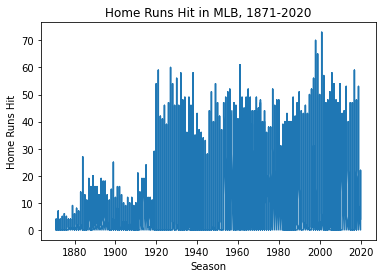

In [5]:
plt.plot(batstats.yearID, batstats.HR)
plt.xlabel("Season")
plt.ylabel("Home Runs Hit")
plt.title("Home Runs Hit in MLB, 1871-2020")
plt.show()

In [6]:
batstats.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [7]:
batstats_arr = batstats.to_numpy()
# batstats_arr

In [8]:
pencehu_stats = pd.DataFrame(columns=['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'])
counter = 0

for a in batstats_arr:
    if a[0] == 'pencehu01':
        pencehu_stats.loc[counter] = a
        counter += 1


In [9]:
# Hunter Pence statistics, 2007-2020 (14 seasons)
pencehu_stats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,pencehu01,2007,1,HOU,NL,108,456,57,147,30,...,69.0,11.0,5.0,26,95.0,0.0,1.0,0.0,1.0,10.0
1,pencehu01,2008,1,HOU,NL,157,595,78,160,34,...,83.0,11.0,10.0,40,124.0,2.0,4.0,0.0,3.0,14.0
2,pencehu01,2009,1,HOU,NL,159,585,76,165,26,...,72.0,14.0,11.0,58,109.0,1.0,1.0,0.0,3.0,25.0
3,pencehu01,2010,1,HOU,NL,156,614,93,173,29,...,91.0,18.0,9.0,41,105.0,2.0,0.0,0.0,3.0,11.0
4,pencehu01,2011,1,HOU,NL,100,399,49,123,26,...,62.0,7.0,1.0,30,86.0,1.0,1.0,0.0,2.0,7.0
5,pencehu01,2011,2,PHI,NL,54,207,35,67,12,...,35.0,1.0,1.0,26,38.0,2.0,0.0,0.0,3.0,8.0
6,pencehu01,2012,1,PHI,NL,101,398,59,108,15,...,59.0,4.0,2.0,37,85.0,1.0,3.0,0.0,2.0,13.0
7,pencehu01,2012,2,SFN,NL,59,219,28,48,11,...,45.0,1.0,0.0,19,60.0,1.0,4.0,1.0,5.0,1.0
8,pencehu01,2013,1,SFN,NL,162,629,91,178,35,...,99.0,22.0,3.0,52,115.0,3.0,3.0,0.0,3.0,17.0
9,pencehu01,2014,1,SFN,NL,162,650,106,180,29,...,74.0,13.0,6.0,52,130.0,3.0,3.0,0.0,3.0,13.0


In [10]:
pencehu_stats.describe()

,RBI,SB,CS,SO,IBB,HBP,SH,SF,GIDP
count,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.0000,16.000000,16.000000
mean,58.875000,7.50000,3.437500,83.437500,1.187500,1.625000,0.0625,2.437500,9.437500
std,24.410039,6.65332,3.669128,32.565767,0.981071,1.408309,0.2500,1.314978,6.324226
min,6.000000,0.00000,0.000000,15.000000,0.000000,0.000000,0.0000,0.000000,1.000000
25%,43.750000,1.75000,1.000000,59.750000,0.750000,0.750000,0.0000,2.000000,6.000000
50%,60.500000,5.50000,1.500000,90.500000,1.000000,1.000000,0.0000,3.000000,9.000000
75%,72.500000,11.50000,5.250000,106.000000,2.000000,3.000000,0.0000,3.000000,13.000000
max,99.000000,22.00000,11.000000,130.000000,3.000000,4.000000,1.0000,5.000000,25.000000


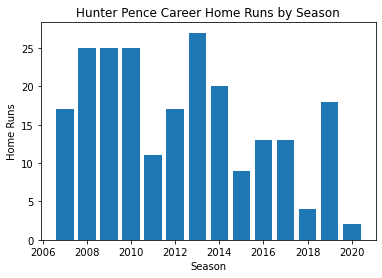

In [11]:
plt.bar(pencehu_stats.yearID, pencehu_stats.HR)
plt.xlabel("Season")
plt.ylabel("Home Runs")
plt.title("Hunter Pence Career Home Runs by Season")
plt.show()

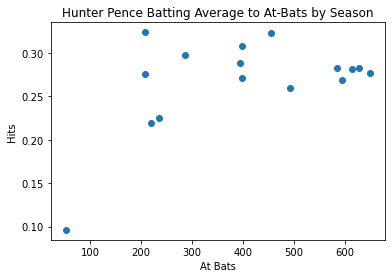

In [12]:
plt.scatter(pencehu_stats.AB, pencehu_stats.H/pencehu_stats.AB)
plt.xlabel("At Bats")
plt.ylabel("Hits")
plt.title("Hunter Pence Batting Average to At-Bats by Season")
plt.show()

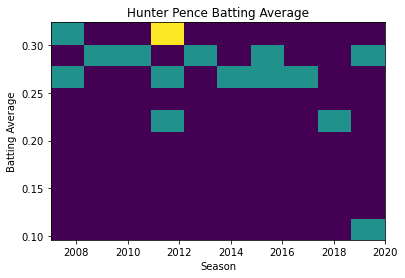

In [13]:
plt.hist2d(pencehu_stats.yearID, (pencehu_stats.H/pencehu_stats.AB))
plt.title("Hunter Pence Batting Average")
plt.xlabel("Season")
plt.ylabel("Batting Average")
plt.show()

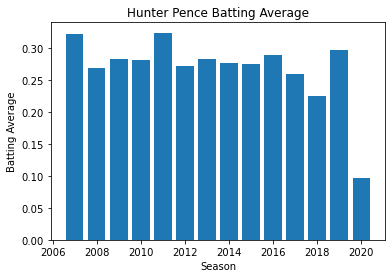

In [14]:
plt.bar(pencehu_stats.yearID, (pencehu_stats.H/pencehu_stats.AB))
plt.title("Hunter Pence Batting Average")
plt.xlabel("Season")
plt.ylabel("Batting Average")
plt.show()

In [15]:
pencehu_stats.H.mean()

111.9375

In [16]:
print("Mean:\nHR:", pencehu_stats.HR.mean(), "\nDoubles:", pencehu_stats['2B'].mean(), "\nTriples:", pencehu_stats['3B'].mean(),
"\nRBIs:", pencehu_stats['RBI'].mean(), "\nHits:", pencehu_stats['H'].mean(), "\nSingles:", 
(pencehu_stats['H'].mean()- (pencehu_stats['2B'].mean() + pencehu_stats['3B'].mean() + pencehu_stats['HR'].mean())))

Mean:
HR: 15.25 
Doubles: 20.25 
Triples: 3.4375 
RBIs: 58.875 
Hits: 111.9375 
Singles: 73.0


In [17]:
pencehu_stats.yearID == 2011


0     False
1     False
2     False
3     False
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
Name: yearID, dtype: bool

In [18]:
pencehu_stats.yearID == 2012

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
Name: yearID, dtype: bool

Pence played for two different teams in 2011 (HOU-->PHI) and 2012 (PHI-->SF) <br>
Combine the stats from both teams Pence played in. 

In [24]:
penceh_arr = pencehu_stats.H.to_numpy()
len(penceh_arr)
# penceh_arr

16

In [19]:
# Data with more than one team in year
pencehu_stats[4:8]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
4,pencehu01,2011,1,HOU,NL,100,399,49,123,26,...,62.0,7.0,1.0,30,86.0,1.0,1.0,0.0,2.0,7.0
5,pencehu01,2011,2,PHI,NL,54,207,35,67,12,...,35.0,1.0,1.0,26,38.0,2.0,0.0,0.0,3.0,8.0
6,pencehu01,2012,1,PHI,NL,101,398,59,108,15,...,59.0,4.0,2.0,37,85.0,1.0,3.0,0.0,2.0,13.0
7,pencehu01,2012,2,SFN,NL,59,219,28,48,11,...,45.0,1.0,0.0,19,60.0,1.0,4.0,1.0,5.0,1.0


In [20]:
pencehu_stats.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

Kris Bryant Statistics (CHI)



In [36]:
kb_stats = pd.DataFrame(columns=['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'])
counter = 0

for a in batstats_arr:
    if a[0] == 'bryankr01':
        kb_stats.loc[counter] = a
        counter += 1

kb_stats

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,bryankr01,2015,1,CHN,NL,151,559,87,154,31,...,99.0,13.0,4.0,77,199.0,0.0,9.0,0.0,5.0,7.0
1,bryankr01,2016,1,CHN,NL,155,603,121,176,35,...,102.0,8.0,5.0,75,154.0,5.0,18.0,0.0,3.0,3.0
2,bryankr01,2017,1,CHN,NL,151,549,111,162,38,...,73.0,7.0,5.0,95,128.0,5.0,15.0,0.0,6.0,8.0
3,bryankr01,2018,1,CHN,NL,102,389,59,106,28,...,52.0,2.0,4.0,48,107.0,6.0,17.0,0.0,3.0,5.0
4,bryankr01,2019,1,CHN,NL,147,543,108,153,35,...,77.0,4.0,0.0,74,145.0,1.0,15.0,0.0,2.0,10.0
5,bryankr01,2020,1,CHN,NL,34,131,20,27,5,...,11.0,0.0,0.0,12,40.0,0.0,4.0,0.0,0.0,1.0


In [37]:
kb_stats.describe()

,RBI,SB,CS,SO,IBB,HBP,SH,SF,GIDP
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000
mean,69.000000,5.666667,3.000000,128.833333,2.833333,13.000000,0.0,3.166667,5.666667
std,33.828982,4.676181,2.366432,53.266938,2.786874,5.403702,0.0,2.136976,3.326660
min,11.000000,0.000000,0.000000,40.000000,0.000000,4.000000,0.0,0.000000,1.000000
25%,57.250000,2.500000,1.000000,112.250000,0.250000,10.500000,0.0,2.250000,3.500000
50%,75.000000,5.500000,4.000000,136.500000,3.000000,15.000000,0.0,3.000000,6.000000
75%,93.500000,7.750000,4.750000,151.750000,5.000000,16.500000,0.0,4.500000,7.750000
max,102.000000,13.000000,5.000000,199.000000,6.000000,18.000000,0.0,6.000000,10.000000


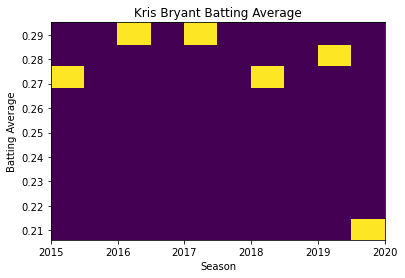

In [39]:
# kb_stats.RBI.max()
plt.hist2d(kb_stats.yearID, (kb_stats.H/kb_stats.AB))
plt.title("Kris Bryant Batting Average")
plt.xlabel("Season")
plt.ylabel("Batting Average")
plt.show()